<h3>Genetic Algorithm (Algoritmo Genético) na Previsão das Cotações do Dólar</h3>

<h4>Importação das Classes, Instanciação das Variáveis e Exploração dos Dados</h4>

In [8]:
from Neuraline.Utilities.data import DataTable, DataExploration
from Neuraline.Utilities.chart import Chart
data_table, data_exploration, chart = DataTable(), DataExploration(), Chart()
url_path, url_save = './USD_BRL.csv', './previsoes_do_dolar.csv'
result = data_table.visualization_csv_inline(url_path, limit=10)

╒══════════╤════════════╤══════════╤══════════╕
│   Último │   Abertura │   Máxima │   Mínima │
╞══════════╪════════════╪══════════╪══════════╡
│   5.2422 │     5.1833 │   5.257  │   5.1462 │
├──────────┼────────────┼──────────┼──────────┤
│   5.1831 │     5.1229 │   5.2122 │   5.1229 │
├──────────┼────────────┼──────────┼──────────┤
│   5.1223 │     5.0285 │   5.1259 │   5.0076 │
├──────────┼────────────┼──────────┼──────────┤
│   5.0282 │     5.0608 │   5.0917 │   5.01   │
├──────────┼────────────┼──────────┼──────────┤
│   5.0601 │     5.1102 │   5.1175 │   5.054  │
├──────────┼────────────┼──────────┼──────────┤
│   5.1099 │     5.1114 │   5.1437 │   5.0852 │
├──────────┼────────────┼──────────┼──────────┤
│   5.1114 │     5.105  │   5.1244 │   5.0802 │
├──────────┼────────────┼──────────┼──────────┤
│   5.1037 │     5.1576 │   5.1579 │   5.07   │
├──────────┼────────────┼──────────┼──────────┤
│   5.1574 │     5.1706 │   5.2046 │   5.1498 │
├──────────┼────────────┼──────────┼────

<h4>Separação dos Dados Entre Treinamento e Teste</h4>

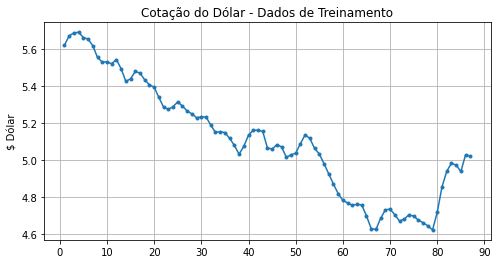

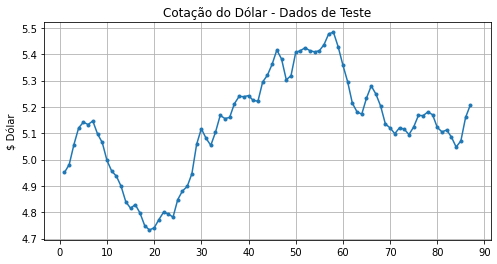

In [4]:
y_training, _, y_test, _ = data_exploration.dataSeparationCSV(url_path=url_path, training_percentage=.5, test_percentage=.5)
chart.plotLINE(y=y_training, y_label='$ Dólar', title='Cotação do Dólar - Dados de Treinamento')
chart.plotLINE(y=y_test, y_label='$ Dólar', title='Cotação do Dólar - Dados de Teste')

<h4>Treinamento do Modelo Genético</h4>

In [5]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.genetic_algorithm import GeneticAlgorithm
genetic_algorithm = GeneticAlgorithm()

result = genetic_algorithm.fit(inputs=y_training, n_populations=2, n_individuals=15)

<h4>Predição do Modelo Genético</h4>

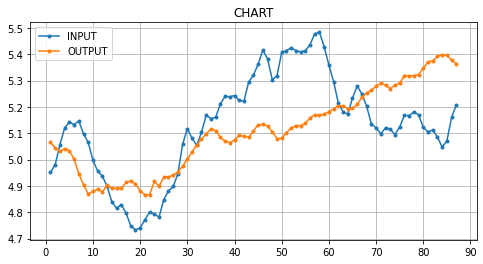

╒══════════╤════════════╤══════════╤══════════╕
│   Último │   Abertura │   Máxima │   Mínima │
╞══════════╪════════════╪══════════╪══════════╡
│  5.39195 │    5.33819 │  5.4148  │  5.3114  │
├──────────┼────────────┼──────────┼──────────┤
│  5.39075 │    5.36314 │  5.42192 │  5.33158 │
├──────────┼────────────┼──────────┼──────────┤
│  5.39907 │    5.39609 │  5.43587 │  5.361   │
├──────────┼────────────┼──────────┼──────────┤
│  5.39907 │    5.39609 │  5.43587 │  5.361   │
├──────────┼────────────┼──────────┼──────────┤
│  5.38077 │    5.39846 │  5.43248 │  5.35533 │
├──────────┼────────────┼──────────┼──────────┤
│  5.37575 │    5.37971 │  5.41573 │  5.33123 │
├──────────┼────────────┼──────────┼──────────┤
│  5.35902 │    5.37971 │  5.41573 │  5.33123 │
├──────────┼────────────┼──────────┼──────────┤
│  5.32665 │    5.36271 │  5.39278 │  5.30395 │
├──────────┼────────────┼──────────┼──────────┤
│  5.32183 │    5.31901 │  5.36275 │  5.2882  │
├──────────┼────────────┼──────────┼────

In [6]:
predictions = len(y_test)
y_predict = genetic_algorithm.predict(individuals=predictions)
result = data_table.generation_csv(url_path=url_save, titles=['Último', 'Abertura', 'Máxima', 'Mínima'], data=y_predict)
y_test, y_predict = [[sum(x)/len(x)] for x in y_test], [[sum(x)/len(x)] for x in y_predict]
chart.plotMATRIX(matrix1=y_test, matrix2=y_predict)
result = data_table.visualization_csv_inline(url_save, limit=10)

<h4>Número Máximo de Predições Seguras</h4>

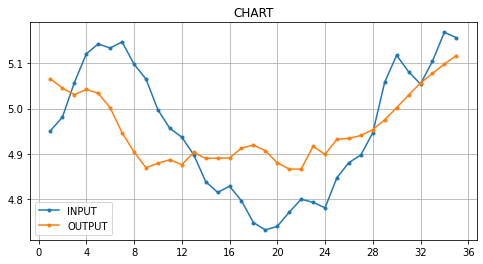

In [7]:
predictive_limit = 35
chart.plotMATRIX(matrix1=y_test[:predictive_limit], matrix2=y_predict[:predictive_limit])